<a href="https://colab.research.google.com/github/edsml-lc2216/test/blob/main_branch/ML_module_coursework_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://drive.google.com/uc?id=1dtR470-kr9MhA_vytTgnLtdrr5X7HaXu" width="150"/>

### CID: 01215000

# Instructions:

Follow the instructions below to complete the coursework and submit it:

1. Read the materials you will need to complete the coursework; you can find them in the github classroom repo provided together with this notebook. The provided materials are: 

  - The paper [*Gradient based learning applied to document recognition*](http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf) by Yann LeCunn where he describes the original form of the LeNet-5 architecture.

  - The paper [*Visualizing the Loss Landscape of Neural Nets*](https://arxiv.org/pdf/1712.09913.pdf).

  - This Jupyter Notebook template to fill in your answers (it contains some code to assist you).


2. Complete your coursework using this provided Jupyter Notebook template (use Google Colab or your local machine if it has a GPU and/or sufficient computational power).

3. Once you have completed your answers, upload your final notebook to the repo you got from the github classroom link (as you normally do). Make sure to have all the answers in there:

   - **All the cells in your final Jupyter Notebook should be executed before saving and uploading to github in order to have the output of the cells available in the uploaded version** (images you plot, training graphs generated with `livelossplot`, etc). We will not guarantee that if some code blocks are missing we will be able to rerun them for you.

   - Add comments in the code to explain what you are doing at every step. 

   - All answers requiring written answers (ie, not code) should be in markdown blocks in the Jupyter Notebook. This provided Jupyter Notebook template has allocated blocks for the questions, but you can add any coding or markdown blocks that you need.

4. The coursework is released on **Friday 13 May at 15:30h BST**, and the answers have to be submitted on **Saturday  21 May, 23:59h BST**. We will not accept late submissions.

    ***[BST stands for British Summer Time (local UK time)]***

<br>

---
<br>

### The coursework consists of a number of questions/exercises you have to complete. You will find them below.

## Imports

In [1]:
# your imports and initial checks here
!pip install livelossplot
! pip install py-markdown-table


import numpy as np
import random 
import os
import pathlib
from PIL import Image
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from livelossplot import PlotLosses

import pandas as pd
from markdownTable import markdownTable
from sklearn.model_selection import train_test_split

from torch.nn.utils import (
  parameters_to_vector as Params2Vec,
  vector_to_parameters as Vec2Params
)





def set_seed(seed):
    """
    Use this to set ALL the random seeds to a fixed value and take out any randomness from cuda kernels
    """
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

    torch.backends.cudnn.benchmark = False  ##uses the inbuilt cudnn auto-tuner to find the fastest convolution algorithms. -
    torch.backends.cudnn.enabled   = False

    return True


device = 'cpu'
if torch.cuda.device_count() > 0 and torch.cuda.is_available():
    print("Cuda installed! Running on GPU!")
    device = 'cuda'
else:
    print("No GPU available!")



     |████████████████████████████████| 793 kB 12.6 MB/s 
     |████████████████████████████████| 381 kB 45.7 MB/s 
  Attempting uninstall: prompt-toolkit
    Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Attempting uninstall: ipython
    Found existing installation: ipython 5.5.0
    Uninstalling ipython-5.5.0:
      Successfully uninstalled ipython-5.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-console 5.2.0 requires prompt-toolkit<2.0.0,>=1.0.0, but you have prompt-toolkit 3.0.29 which is incompatible.
google-colab 1.0.0 requires ipython~=5.5.0, but you have ipython 7.33.0 which is incompatible.


Cuda installed! Running on GPU!


## 1-Load the medical MNIST dataset [10 points]
Go to this [kaggle dataset](https://www.kaggle.com/datasets/andrewmvd/medical-mnist/code) and download the data (see provided snippets below).

Format the data as you see fit to use it in your next questions. Explain the process you follow.

[**It is recommended that you convert the images to grayscale using** *torchvision transforms*]

Use the following snippets of code to help you download the data first:

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# Get kaggle authentication json
! mkdir ~/.kaggle
! cp -a /content/gdrive/MyDrive/kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! ls ~/.kaggle


kaggle.json


In [4]:
# Download and unzip dataset
! kaggle datasets download -d andrewmvd/medical-mnist
! mkdir ./medical-mnist
! unzip -q ./medical-mnist.zip -d medical-mnist

 92% 78.0M/84.8M [00:01<00:00, 54.9MB/s]
100% 84.8M/84.8M [00:01<00:00, 49.7MB/s]


## 2-Plot data [5 points]
Plot 25 images of the training set together with their corresponding label names.






In [5]:
# your code goes here
data_dir = 'medical-mnist' # get path to datasets
classes = os.listdir(data_dir) # get lables by getting folder names in directory 

In [6]:
classes
classes.sort()

In [7]:
file_path = []
file_class = []

for root_dir, dir, file in os.walk(data_dir): 
    p = pathlib.Path(root_dir).parts[-1] # get what folder file is in 

    for f in file:
      file_path.append(root_dir + '/' + f) # append file path to list 
      file_class.append(p) # append label to list 



In [8]:
assert len(file_path) == len(file_class)

In [31]:
X = []
y = np.asarray(file_class)

for path in file_path:
  img = Image.open(path) # open image by filepath 
  transform = transforms.Grayscale() # transform image to grayscale - but images already one channel??
  img = transform(img)

  X.append(np.asarray(img)) 

X = np.asarray(X)






**Why grayscale?**   
    Colours are not relevant in object-identification. Model is  learning from the geometry  rather than the colours present in the image.
  Making the image binary will also help increase the sharpness of the image at the boundary of the light and dark areas.  


In [10]:
X.shape

(58954, 64, 64)

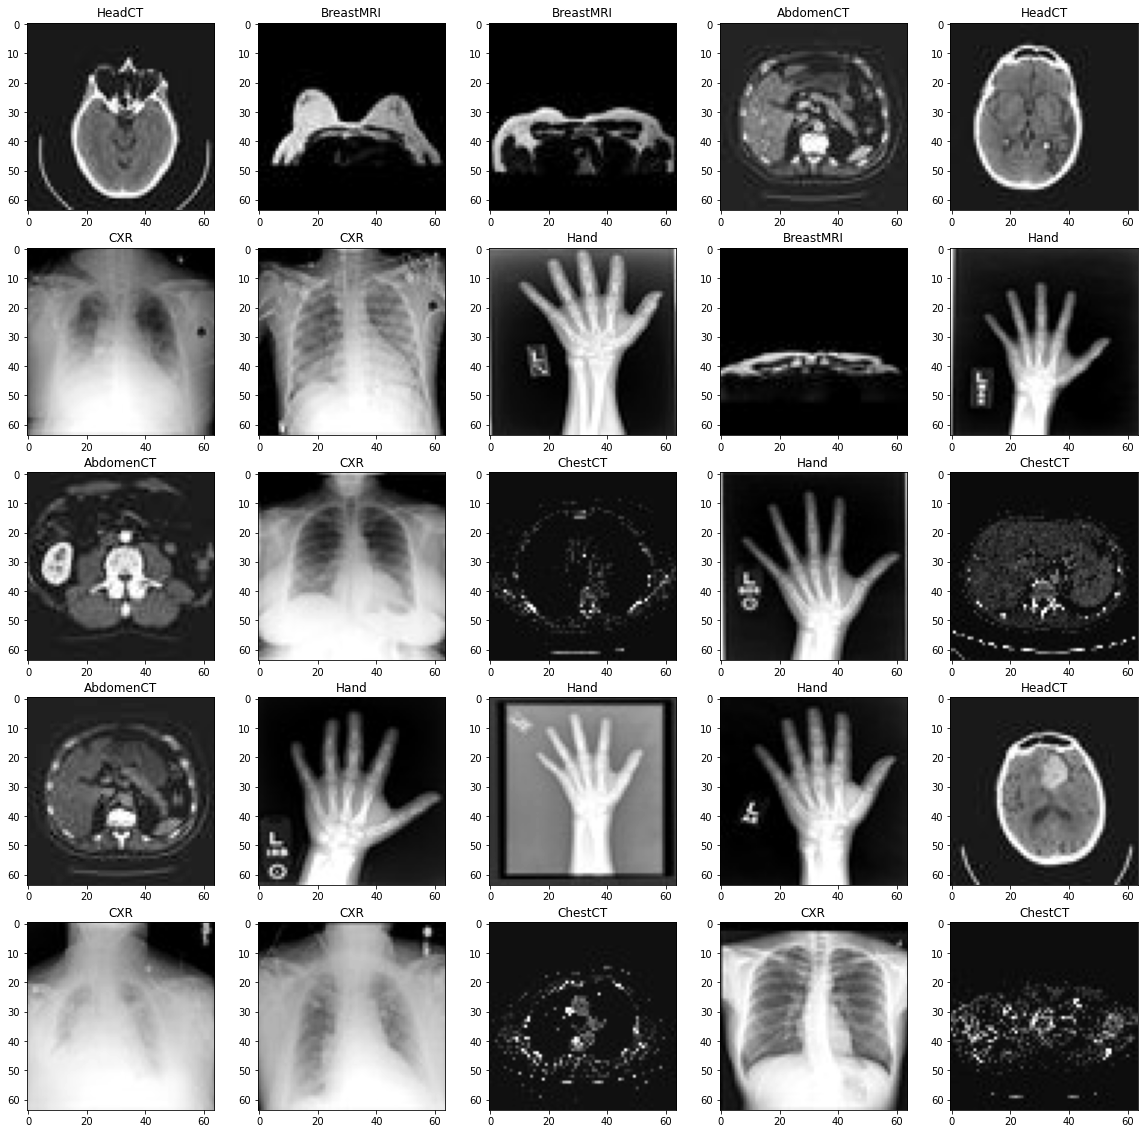

In [11]:
fig=plt.figure(figsize=(20, 20))
columns = 5
rows = 5
for i in range(1, columns*rows +1):
    
    n = np.random.randint(0,X.shape[0]) # get random index
    fig.add_subplot(rows, columns, i)
    plt.imshow(X[n], cmap=plt.cm.gray)
    plt.title(y[n])
plt.show()

## 3-Prepare your LeNet-5 network [10 points]
Use the code provided in the Jupyter Notebook template and modify it as you see fit to be able to perform a forward pass using a single dummy tensor input **x**.

Do you need to modify the size of any layers of the network for the Medical MNIST dataset? If yes, explain how you did it and implement the changes.

The lines of code that will do the forward pass and print the network are provided in the template.


- All convolutional layers with trainable parameters should have:
  - kernel-size=5
  - stride 1
  - padding 2.  
- All MaxPool layers use a kernel size 2 and a stride value of 2.
- Use ReLUs for all activations.
- Default in most layers in PyTorch is to include bias terms.


In [12]:
#     make modifications in the code below

class LeNet5(nn.Module):
  def __init__(self):
    super(LeNet5, self).__init__()
    self.c1 = nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=2) # define a 2D convolutional layer - *************CHANGED*************
    self.s2 = nn.MaxPool2d(kernel_size=2, stride=2)  # define a maxpool layer
    self.c3 = nn.Conv2d(6, 16, kernel_size=5, stride=1)   # new 2D convolutional layer
    self.s4 = nn.MaxPool2d(kernel_size=2, stride=2) # another maxpool layer
    self.c5 = nn.Linear(16*14*14, 120)  # first linear layer -  *************CHANGED*************
    self.f6 = nn.Linear(120, 84)    # second linear layer
    self.output = nn.Linear(84, 6)   # final output layer -  *************CHANGED*************
    self.act = nn.ReLU()    # activation function        
    
  def forward(self, x):
    x = self.act(self.c1(x))      # activate pass through the first layer
    x = self.act(self.s2(x))     # activate pass through the second layer
    x = self.act(self.c3(x))      # activate pass through the third layer
    x = self.act(self.s4(x))      # activate pass through the fourth layer
    x = x.view(-1, x.size(1)*x.size(2)*x.size(3))   # flatten (return a "flattened" view of the 3d tensor as inputs for the fully connected layer)
    x = self.act(self.c5(x))    # activate pass through fifth layer
    x = self.act(self.f6(x))     # activate pass through last layer
    return self.output(x)         # return outputv  
  
# Dummy input of the same size as the Medical-MNIST images
## generate a dummy tensor x
x_samp = torch.randn((1, 1, 64,64))
## get an instance of your model and call it model
model = LeNet5()
y_samp = model(x_samp) # if you have called your instance something different than model, modify this line of code
print(model)
print(x_samp.shape, y_samp.shape)

LeNet5(
  (c1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (s2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (c3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (s4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (c5): Linear(in_features=3136, out_features=120, bias=True)
  (f6): Linear(in_features=120, out_features=84, bias=True)
  (output): Linear(in_features=84, out_features=6, bias=True)
  (act): ReLU()
)
torch.Size([1, 1, 64, 64]) torch.Size([1, 6])


# CHANGES MADE: 
**self.c1 = nn.Conv2d(3, 6, kernel_size=5, stride=1, padding=1)**  change to **self.c1 = nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=1)**. We have images with only one layer, not three representing RGB. 

**self.c5 = nn.Linear(16x5x5, 120)**   to     **self.c5 = nn.Linear(16x14x14, 120)**  - s4 subsamples data to 16 layers of 13 x 13 images (not 5 x 5) 

input image size = (64 x 64)   
 using ((n+2p -f/s) +1) x ((n+2p -f/s) +1): 

  c1 output = (64 x 64) , 6 layers   
  s2 outut = (32 x 32), 6 layers  
  c3 output = (28 x 28), 16 layers  
  s4 output = (14 x 14), 16 layers   
  flatten data to (16 x 3136)   
  c5 output = 120  
  f6 output = 84   
  output = 6 


**self.c1 = nn.Conv2d(3, 6, kernel_size=5, stride=1, padding=1)** to **self.c1 = nn.Conv2d(3, 6, kernel_size=5, stride=1, padding=2)** - change padding to 2. LeNet5 needs a padding =2 in convolutional networks 

**self.output = nn.Linear(84, 10)** to **self.output = nn.Linear(84, 6)** -  unite in output layer need to be the same as number of classes 

## 4-Create a training, validation split [5 points]
Split the data using `sklearn.model_selection.StratifiedShuffleSplit`:

- 90\% of the data in the training set
- 10\% of the data in the validation set

Verify the stratified shuffle split by plotting a histogram of the classes in the training and validation set.

Prepare the downloaded datasets to be used with your modified network from the previous section.

In [32]:
# encode classes (labels) - so we can create a tensor from array - cannot create a tensor of strings. 
values = np.array(classes) 
label_encoder = LabelEncoder()
label_encoder.fit(values)
y = label_encoder.transform(y)


mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_)))) # get keys used to encode labels 

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)#  frist lets split the data into train and test sets - 0.9/0.1 split 

In [34]:
X_train = torch.from_numpy(X_train).float() # turn images and labels in tensor onjects 
y_train = torch.from_numpy(y_train).float()
X_test = torch.from_numpy(X_test).float() # turn images and labels in tensor onjects 
y_test = torch.from_numpy(y_test).float()



In [35]:
print(X.min(), X.max(), X.mean(), X.std())


0 255 91.37865301942908 71.96033049797194


In [36]:
def apply_standardization(X): # define a standardisation function
  X /= 255.
  X -= X.mean()
  X /= X.std()
  return X

In [37]:
X_train = apply_standardization(X_train)
X_test = apply_standardization(X_test)

In [38]:
X_test.mean() 

tensor(-1.3684e-07)

After normalisation the mean of the data is close to zero. This generally speeds up learning and leads to faster convergence

In [39]:
X_train.size() # check is 90% of original data 

torch.Size([53058, 64, 64])

In [40]:
# split data into validation and train sets - 0.1/0.9 split
shuffler = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=42).split(X_train, y_train)
indices = [(train_idx, validation_idx) for train_idx, validation_idx in shuffler][0] # seperate training and validation indices 

In [41]:
X_validate, y_validate = X_train[indices[1]].float(), y_train[indices[1]] # get testing data 


In [42]:
X_train, y_train = X_train[indices[0]].float(), y_train[indices[0]] # get trainging data 

In [43]:
X_validate.size() # size of data in  validation set is nearly as many as the test set 

torch.Size([5306, 64, 64])

In [44]:
lab_val, idx_val, count_val = tf.unique_with_counts(y_validate) # get count of each label in testing data 
lab_train, idx_train, count_train = tf.unique_with_counts(y_train) # get count of each label in training data 


In [45]:
count_val = tf.sort(count_val)
lab_val = tf.sort(lab_val)
count_train = tf.sort(count_train)
lab_train = tf.sort(lab_train)

In [46]:
def addlabels(x,y): # function to add values to bar chart to check shuffle split has correctly done a 0.9/0.1 split
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

Text(0.5, 0, "['AbdomenCT', 'BreastMRI', 'CXR', 'ChestCT', 'Hand', 'HeadCT']")

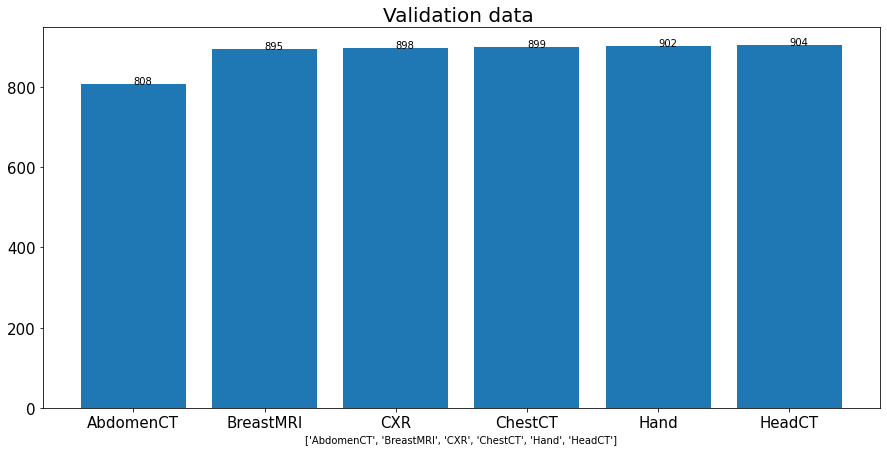

In [47]:
plt.figure(figsize=(15,7))
plt.bar(classes, count_val.numpy())
plt.title('Validation data ', fontsize=20)
addlabels(lab_val.numpy(), count_val.numpy())
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel(classes)


 

Text(0.5, 0, "['AbdomenCT', 'BreastMRI', 'CXR', 'ChestCT', 'Hand', 'HeadCT']")

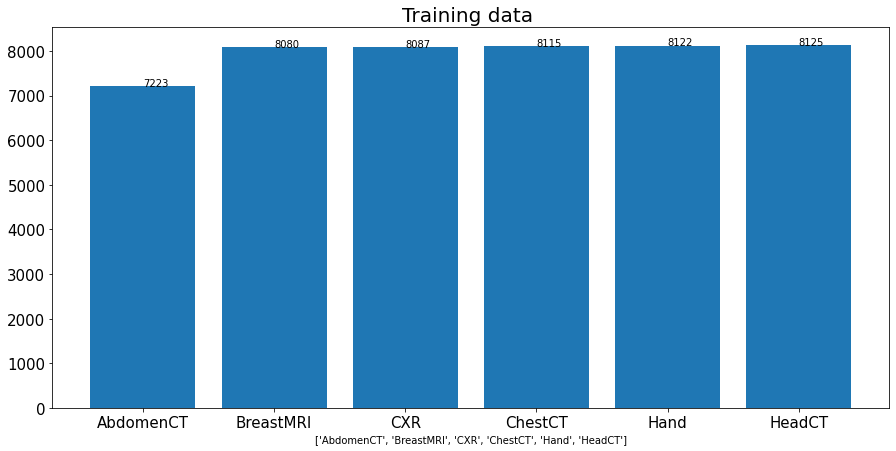

In [ ]:
plt.figure(figsize=(15,7))
plt.bar(classes, count_train.numpy())
plt.title('Training data ', fontsize=20)
addlabels(lab_train.numpy(), count_train.numpy())
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel(classes)



In [48]:
#####Prepare the downloaded datasets to be used with modified network from the previous section.
mnist_train = TensorDataset(X_train, y_train.long())  # create tensor datasets to train and validate the performance of our NN
mnist_validate = TensorDataset(X_validate, y_validate.long())
mnist_test = TensorDataset(X_test, y_test.long()) # tesnor dataset for final evaluation 

## 5-Grid search [20 points]
From  the  list  below,  select  two  hyperparameters  and  perform  a  2D  grid-search  to  find  the  optimal values for these two hyperparameters.  The range of values to test are provided.  Justify your choice of the two hyperparameters you want to tune (write a paragraph in a markdown cell explaining why you chose these two particular parameters). 

The list of hyperparameters to choose from is:

a)  Random Number Seed:  **42**  [31, 42, 53] \
b)  Learning Rate:  **1e-2**  [1e-1, 1e-2, 1e-3] \
c)  Momentum:  **0.5**  [0.2, 0.5, 0.8] \
d)  Batch Size:  **64**  [64, 128, 512] \
e)  Number of epochs:  **30**  [10, 30, 50]

The **values in bold** next to each hyperparameter are the values you need to use if you are not tuning this particular hyperparameter.  The values between square brackets are the values to use if you choose to tune this particular hyperparameter. Fixed hyperparameters:

- Optimiser: SGD+momentum
- Test batch size: 1000

Write the results in two tables (one for the loss and one for the accuracy) where the columns and rows are the first and second hyperparameter have selected. You can use markdown tables or create the table in python.

Using *livelossplot* to display the training of some grid-search runs (don't need to plot all of them, choose the ones you think are more relevant to explain your hyperparameter search strategy).

Select the best values for the two hyperparameters you have chosen to optimise and **justify your choice**.

##**What hyperparameters?**

**Batch size** - the amount of training data that the NN will run through with each iteraion. The larger the batch size, the more data the NN netork will have to update its weights after each back propagation (after each iteration). Will help train the NN faster. 


**Momentum** - Used in the NN optimizer. Momentum allows for previous changes in the weights of the NN to influence the current direction of movement in gradient descent. Momentum is known to speed up training and prevent getting stuck in local minima of the loss space when optimiziing.

##**Why not others?** 

**Learning rate** - using default 1e-2 as seems appopriate. Having a low learning will guarantee the optimizers ability to reach convergence, but it will affect how long it takes to reach the minimum (longer training). Having a large learning rate can cause divergent behaviour in the loss function and you can overshoot the minimum (no convergence). 1e-2 a good compromise 
Also if I am performing a grid search on momentum, there is no point performing a grid search on learning rate as well. Both momentum and learning rate will determine the SGD optimizer and increasing momentum, will counteact a decrease in learning rate.

$v(t) = momentum*v(t-1) + lr*g(t))$ 

where v : weight update at iteration t  
      g : gradient at iteration t   
from:  https://towardsdatascience.com/gradient-descent-with-momentum-59420f626c8f

 

**Epoch** - Fairly large training data set (47752). 10 epochs likely too few to train the NN well. 50 likely too many and would take too long. 30 seems a good compromise. 

**Random seed** - Random seeds allows our NN to achieve reproducibility. It will make sure anyone else running the NN with the same seed will have the same initial random parameters. If model updates weight correctly as it trains the random seed is not critical to NN performance. 

In [49]:
# your code goes here
momentum = [0.2, 0.5, 0.8]
batch_size = [64, 128, 512]
epoch = 30
seed = 42
lr = 1e-2


In [50]:
# Define train, validate and evaluation functions 
def train(model, optimizer, criterion, data_loader):
    model.train()
    train_loss, train_accuracy = 0, 0 # reset the value of the loss value after every epoch
    for X, y in data_loader:
        X, y = X.to(device), y.to(device) # get images and labels 
        optimizer.zero_grad() # reset gradients
        a2 = model(X.view(-1, 1, 64, 64)) # forward propagate through the model
        loss = criterion(a2, y) # compute loss
        loss.backward() # backpropagate 
        train_loss += loss*X.size(0) # undo normalisation done by cross entropy loss 
        y_pred = F.log_softmax(a2, dim=1).max(1)[1] # acivation function on output layer to get highest proability
        train_accuracy += accuracy_score(y.cpu().numpy(), y_pred.detach().cpu().numpy())*X.size(0) # calculate accuracy and normalise 
        optimizer.step()  # upadate model 

    return train_loss/len(data_loader.dataset), train_accuracy/len(data_loader.dataset) # returned normalised loss 

In [51]:
def validate(model, criterion, data_loader):
    model.eval()
    validation_loss, validation_accuracy = 0., 0.
    for X, y in data_loader:
        with torch.no_grad():
            X, y = X.to(device), y.to(device)
            a2 = model(X.view(-1, 1, 64, 64))
            loss = criterion(a2, y)
            validation_loss += loss*X.size(0)
            y_pred = F.log_softmax(a2, dim=1).max(1)[1]
            validation_accuracy += accuracy_score(y.cpu().numpy(), y_pred.cpu().numpy())*X.size(0)
            
    return validation_loss/len(data_loader.dataset), validation_accuracy/len(data_loader.dataset)

In [52]:
def evaluate(model, data_loader):
    model.eval()
    ys, y_preds = [], []

    test_loss = 0.0
    for X, y in data_loader:
        with torch.no_grad():
            X, y = X.to(device), y.to(device)
            a2 = model(X.view(-1, 1, 64, 64))
            loss = criterion(a2, y)
            test_loss += loss*X.size(0)
            y_pred = F.log_softmax(a2, dim=1).max(1)[1]
            ys.append(y.cpu().numpy())
            y_preds.append(y_pred.cpu().numpy())
            
    return np.concatenate(y_preds, 0),  np.concatenate(ys, 0), test_loss/len(data_loader.dataset)

In [53]:
def model_train(seed, lr, momentum, epoch, batch_size, live_plot=False):


  set_seed(seed)                    # set seed
  model = LeNet5().to(device)    # instantiate model and send it to the GPU
  optimizer = torch.optim.SGD(model.parameters(), lr=lr, momentum=momentum)  # define an optimiser
  criterion = nn.CrossEntropyLoss() # define the loss function
  
  train_loader = DataLoader(mnist_train, batch_size=batch_size, shuffle=True, num_workers=0)               # train_loader
  validation_loader = DataLoader(mnist_validate, batch_size=1000, shuffle=False, num_workers=0)           # test_loader
  
  liveloss = PlotLosses() # call instance of plot loss 
  
  for epoch in range(epoch):
      logs = {} # initiate empty dictionary to store results for each epoch 
      train_loss, train_accuracy = train(model, optimizer, criterion, train_loader) # calculate training loss and accuracy
 
      logs['log loss'] = train_loss.item() # store results in dictionary 
      logs['accuracy'] = train_accuracy.item()

      
      validation_loss, validation_accuracy = validate(model, criterion, validation_loader)  # calculate validation loss and accuracy for plotting
      logs['val_' + 'log loss'] = validation_loss.item()
      logs['val_' + 'accuracy'] = validation_accuracy.item()

      if live_plot == True: 
        liveloss.update(logs)# plot results 
        liveloss.draw()
      else: 

        if (epoch+1) % 10 == 0.0: 
          print("After ", epoch+1 ," epochs: Training accuracy = %1.3f" % train_accuracy.item(), "Training loss = %1.3f" % train_loss.item())
          print("Validation accuracy = %1.3f" % validation_accuracy.item(), "Validation loss = %1.3f" % validation_loss.item())
          print("")







  #val_loss, val_accuracy = validate(model, criterion, validation_loader)   # calculate avergae  validation loss and accuracy 
  #print("Avg. Validation Loss: %1.3f" % val_loss.item(), " Avg. Validation Accuracy: %1.3f" % val_accuracy.item()) # print test results AVERGAE???
  #print("")

    
  return validation_loss.item(), validation_accuracy.item()

In [ ]:
validation_accuracy = []
validation_loss = []
# potentially add timing
for i in momentum:
  for j in batch_size: 

    print("Momentum = ", i, " | Batch size = ", j)
    v_loss, v_acc = model_train(seed, lr, i, epoch, j, live_plot=False)

    validation_accuracy.append(v_acc)
    validation_loss.append(v_loss)
    print('-----------------------------------------------------------------------')

Momentum =  0.2  | Batch size =  64
After  10  epochs: Training accuracy = 0.998 Training loss = 0.007
Validation accuracy = 0.997 Validation loss = 0.010

After  20  epochs: Training accuracy = 0.999 Training loss = 0.002
Validation accuracy = 0.997 Validation loss = 0.011

After  30  epochs: Training accuracy = 1.000 Training loss = 0.001
Validation accuracy = 0.998 Validation loss = 0.007

-----------------------------------------------------------------------
Momentum =  0.2  | Batch size =  128
After  10  epochs: Training accuracy = 0.998 Training loss = 0.009
Validation accuracy = 0.997 Validation loss = 0.012

After  20  epochs: Training accuracy = 0.999 Training loss = 0.004
Validation accuracy = 0.998 Validation loss = 0.009

After  30  epochs: Training accuracy = 0.999 Training loss = 0.002
Validation accuracy = 0.998 Validation loss = 0.008

-----------------------------------------------------------------------
Momentum =  0.2  | Batch size =  512
After  10  epochs: Trainin

In [ ]:
 data_accuracy = np.array([['      ',  batch_size[0], batch_size[1], batch_size[2]],
                    [momentum[0], validation_accuracy[0], validation_accuracy[1], validation_accuracy[2]], 
                    [momentum[1], validation_accuracy[3], validation_accuracy[4], validation_accuracy[5]],
                    [momentum[2], validation_accuracy[6], validation_accuracy[7], validation_accuracy[8]]
                
 ])



df = pd.DataFrame(data=data_accuracy[1:,1:], index=data_accuracy[1:,0], columns=data_accuracy[0,1:])
print("validation accuracy momentum vs batch size:")
df

validation accuracy momentum vs batch size:


,64,128,512
0.2,0.9981153411232567,0.9979268752355823,0.996607614021862
0.5,0.998303807010931,0.998303807010931,0.997173011684885
0.8,0.998869204673954,0.9984922728986053,0.998303807010931


In [ ]:
 data_loss= np.array([['      ',  batch_size[0], batch_size[1], batch_size[2]],
                    [momentum[0], validation_loss[0], validation_loss[1], validation_loss[2]], 
                    [momentum[1], validation_loss[3], validation_loss[4], validation_loss[5]],
                    [momentum[2], validation_loss[6], validation_loss[7], validation_loss[8]]
                
 ])



df2 = pd.DataFrame(data=data_loss[1:,1:], index=data_loss[1:,0], columns=data_loss[0,1:])
print("validation loss momentum vs batch size:")
df2

validation loss momentum vs batch size:


,64,128,512
0.2,0.007091971579939127,0.00786843616515398,0.01114161778241396
0.5,0.005714559927582741,0.007041766308248043,0.009794171899557114
0.8,0.004907761234790087,0.004903697874397039,0.008074350655078888


All seem to perform well. High accuracy and low loss for both training and validation - so our model is not overfitting or underfitting. 

Our best performing model is with a batch size of 128 and a momentum of 0.8(gives lowest validation loss). 

A batch size of 64 and a momentum of 0.8 also performs well ( and also gives a higher accuracy than batchsize = 128, but a larger loss????)

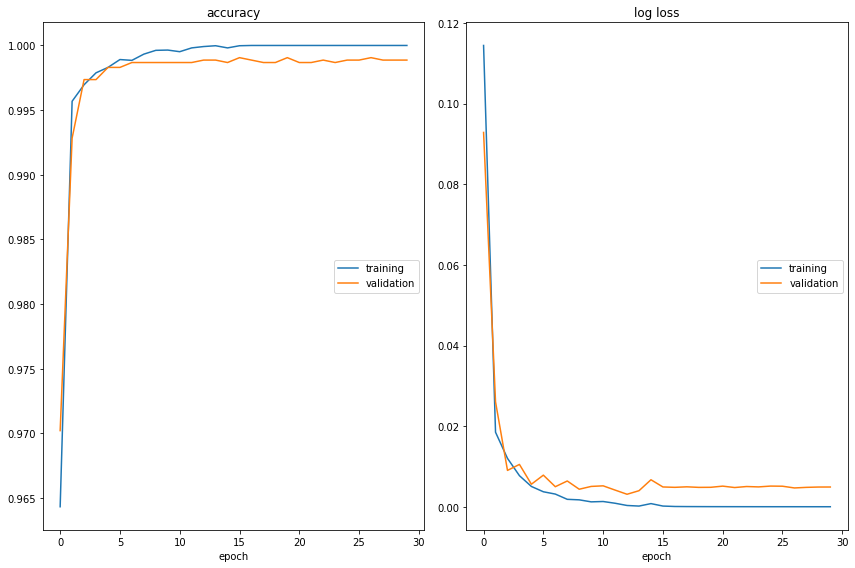

accuracy
	training         	 (min:    0.964, max:    1.000, cur:    1.000)
	validation       	 (min:    0.970, max:    0.999, cur:    0.999)
log loss
	training         	 (min:    0.000, max:    0.114, cur:    0.000)
	validation       	 (min:    0.003, max:    0.093, cur:    0.005)


(0.004907761234790087, 0.998869204673954)

In [ ]:
# momentum = 0.8, batch_size = 64
model_train(seed, lr, 0.8, epoch, 64, live_plot=True)

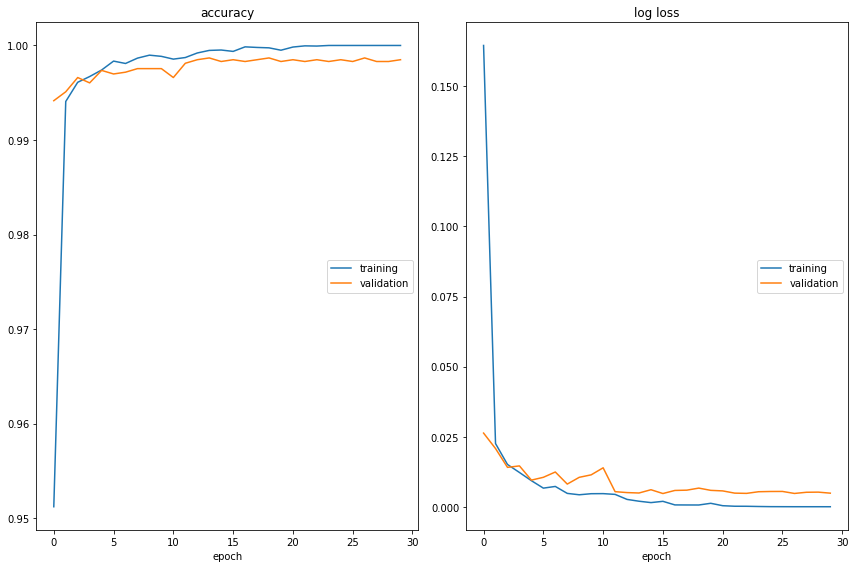

accuracy
	training         	 (min:    0.951, max:    1.000, cur:    1.000)
	validation       	 (min:    0.994, max:    0.999, cur:    0.998)
log loss
	training         	 (min:    0.000, max:    0.165, cur:    0.000)
	validation       	 (min:    0.005, max:    0.026, cur:    0.005)


(0.004903697874397039, 0.9984922728986053)

In [ ]:
model_train(seed, lr, 0.8, epoch, 128, live_plot=True)

Lets use the smaller batch size of 64 as it likely reduces training time 

## 6-Train with best hyperparameters [5 points]

Once you have your two best hyperparameters, retrain the model by combining your split datasets **as you see fit** and explain why you chose this particular combination. Report the final accuracy on the test set. Use *livelossplot* to plot the values of the training evolution and explain changes in performance with your new combination of datasets.

In [54]:
# your code goes here\
batch_size = 64
momentum = 0.8


We started off with an training set of 53058 data, and a test set of 5895.4 data (0.90/0.10 split) 

To perform grid search we split our training set into new a training set (47752 data) and validation set (5306 data - roughly the same as the test set).

We then for a number of possible hyperparameters trained our NN on the training set and then tested its performance on the validation set. 

We then picked the hyprerparameters that gave the optimal performance on the validation set - batch size = 64, momentum = 0.8

Now, lets retrain our NN on the training+validation sets (combine them). This will give us a larger data set to train out NN on.  

And then evaluate the performance of the NN with the optimal hyperparameters on the test set

In [55]:
# combine train and validation data 
X_train = np.concatenate((X_train.numpy(), X_validate.numpy()), axis=0)
y_train = np.concatenate((y_train.numpy(), y_validate.numpy()), axis=0)

In [56]:
assert(len(X_train) == int(58954*0.9)) # make sure it is 67% of original dataset 
X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train).float()


In [57]:
####Prepare the downloaded datasets to be used with your modified network from the previous section.
mnist_train = TensorDataset(X_train, y_train.long())  # create tensor datasets to train and evaluate the performance of our NN


In [58]:
train_loader = DataLoader(mnist_train, batch_size=batch_size, shuffle=True, num_workers=0)
test_loader = DataLoader(mnist_test, batch_size=1000, shuffle = False, num_workers=0)


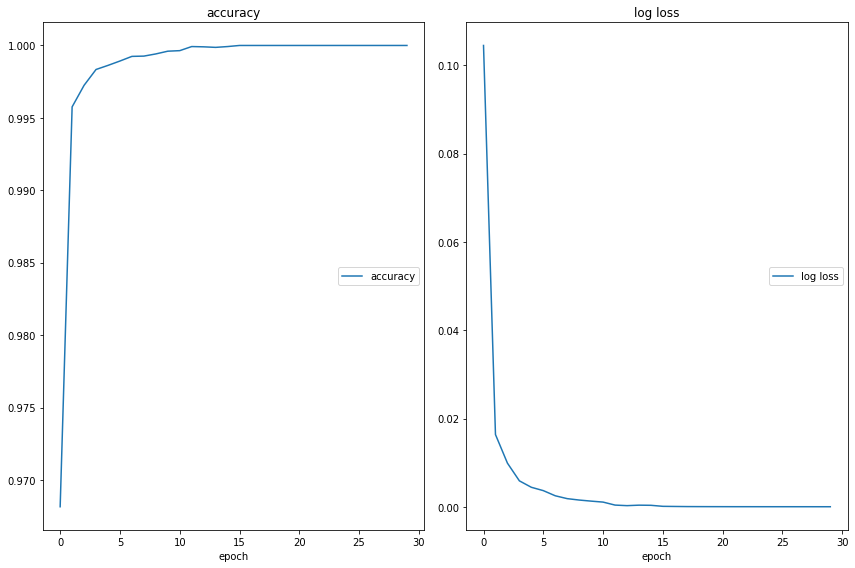

accuracy
	accuracy         	 (min:    0.968, max:    1.000, cur:    1.000)
log loss
	log loss         	 (min:    0.000, max:    0.105, cur:    0.000)


In [59]:
set_seed(seed)
model = LeNet5().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=lr, momentum=momentum)
criterion = nn.CrossEntropyLoss()

liveloss = PlotLosses()
for epoch in range(epoch):
    logs = {}
    train_loss, train_accuracy = train(model, optimizer, criterion, train_loader)

    logs['' + 'log loss'] = train_loss.item()
    logs['' + 'accuracy'] = train_accuracy.item()
    liveloss.update(logs)
    liveloss.draw()

In [ ]:
y_pred, y_s, loss = evaluate(model, test_loader)

In [ ]:
accuracy_score(y_pred, y_s)


0.9994911804613297

In [ ]:
loss

tensor(0.0031)

We see an increase in accuracy compared to when we ran the model with the training and validation test set (0.998869204673954) and a lower loss (0.004907761234790087). This is due to the increased amount of data we are training the NN with after combining the training anf validation test sets, i.e. we are increasing performance on test set by reducing overfitting

## 7-Comparison with original LeNet implementation  [10 points]}
Read the paper *Gradient based learning applied to document recognition* provided. What are the main differences between their implementation and the one you are using in this coursework?

[**You only need to read and understand the paper until section** III. RESULTS AND COMPARISON WITH OTHER METHODS, *B. Results*, **included, which finishes on page 11 (you can ignore the rest)**]



Main differences: 

*    Acivation functions: 

      in my model he ReLU activation function is called after each layer (c1, s2, c3, s4, c5, f6), whereas in their implementation a sigmoid activation is called in all layers up to f6.


*     Output layer: 

      In my implementation the output layer is a linear transform to get a predicition for the target, y = $xA^{T} + b$. Whereas in their output layer, a Euclidean Radical basis function is used $\sum(x_{j} - w_{ij})^{2}$, which is not linear. 


* Layer c5 / flattening data : 
   
   To get the full connection layer c5, we achieve it by flattening our feature  maps from s4 and then passing the data through a linear transformation function. They however achieve c5 using a convolutional layer with a kernel of size 5 x 5. This results in feature maps of size 1 x 1 in c5 as the feature maps in s4 are also of size 5 x 5 (in our case the kernel size would have to be 14x14 if we did it like them)


* Loss functon: 

  In my implementation, a cross entopy loss function is used to perform back propagation and update the weights in the NN. In their model they use a maximum a posteriori approach (a maximum likelihood approach that involves prior pobability of the model) 












## 8-Number of parameters in LeNet-5 [5 points]

Calculate how many trainable parameters the LeNet network you have implemented for this coursework has, and compare it to the number of parameters of the original LeNet network described in the paper you read in the previous question. Explain how you calculate the number of parameters for both cases.

[**answers that only contain the number of parameters without justification will be awarded 0 points**]


* convolutonal layers: 

Number of parameters = $nc^{l} *  ( f^{C} * f^{C} * nc^{l-1} + 1)$     
 = number of filters x size of filter + bias terms

where $nc^{l}$ : number of filters in layer l    
      $f^{C}* f^{C}$: size of kernel


* Max pooling layers: 

No trainable paramters 

* Fully-connected layer: 

Number of paramters = number of elements in previous layer * elements in next layer) + bias terms 


###**Their implementation:**

**C1**: 6 filters, kernel size 5*5 

Number of trainable parameters, N = 6 * (5*5 +1) = 156

**s2**: N = 12 - they multiply their reuslts by a trainable coefficient and add a bias in the maxpool layer before it is passed though a sigmoidal function, we do not. 

**c3:**  16 filters, kernel size 5*5

N = 16 * (5 * 5 * 6 + 1) = 2416

**s4**: N = 32

**c5:** 120 elements, image size in previus layer 5*5

N = (16 * 5 * 5 * 120) + 120 = 48120

**f6**: 84 elements

N = (120 * 84) + 84 = 10164

**output (a fully connected layer)**: 10 elements

N = ( 10 * 84 ) + 10 = 850

**TOTAL**: 61750


###**Our Implementation**

**C1**: 6 filters, kernel size 5*5 

Number of trainable parameters, N = 6 * (5*5 +1) = 156

**s2**: None 

**c3:**  16 filters, kernel size 5*5

N = 16 * (5 * 5 * 6 + 1) = 2416

**s4**: None 

**c5**: 120 elements, image size in previous layer 14*14 

N = (16 * 14 * 14 * 120) + 120 = 376440

**f6**:
N = (120 * 84) + 84 = 10164

**output**: 

N = ( 6 * 84 ) + 6 = 510


**TOTAL**: 389686



Our NN uses roughly six times as many trainable parameters as their model. This is due to the fact that our input images are larger that the ones used in the paper (64x64 vs 32x32). 

The number of parameters only differs for layers f6 and the output. They also used trainable coefficeints when activating after their subsampling layers 

f6 - seen as our input images are larger and because we are using the same kernel sizes (in our convolutional and subsampling layers) as them (in our convolutional and subsampling layers), we need more parameters to connect neurons from the previous layer to this one. 

output - less parameters are needed in the final output of our model as we dont have as many classifcation labels as them (6 vs 10)


## 9-Visualising loss landscapes paper - 1 [10 points]

Read the provided paper *Visualising the Loss Landscape of Neural Nets*. This paper contains a lot of advanced concepts, but you only need to read and understand it well up to and including section 4 (Proposed Visualisation: Filter-Wise Normalisation) to answer the questions below. In section 4 you don't need to fully understand the rationale for doing Filter-Wise Normalisation, but you do need to understand what Filter-Wise Normalisation is.

Answer the following question (in a markdown cell):
- What are the dimensions of the parameters $\delta$, $\eta$, $\alpha$ and $\beta$ in equation (1) using your LeNet network? [5 points]
- Describe what is the role of each of these parameters [5 points]

Explain in detail and justify your answers.     




In [ ]:
model.c1.weight.size()

torch.Size([6, 1, 5, 5])

In [ ]:
model.c3.weight.size()

torch.Size([16, 6, 5, 5])

In [ ]:
model.c5.weight.size()

torch.Size([120, 3136])

In [ ]:
model.f6.weight.size()

torch.Size([84, 120])

In [ ]:
model.output.weight.size()

torch.Size([6, 84])

This function is used to create a 2d contour plot of the loss space around a central minimumm $\theta$*

$\theta*$ - is a central point, representing the original weights of the network 

$\delta$, $\eta$- random direction vectors, sampled from a random gaussian distribution. THey define the direction to the updated value of $\theta$ from the original point $\theta$*. $\delta$ and $\eta$ have the same dimensionality as $\theta$* (our weights).  

$\alpha$ and $\beta$ are matrices that define the loss space. They will have a dimension of 5x5 as all of our filters are 5x5. They represent the small steps taken when we are travelling in the direction of $\delta$ and $\eta$ 


- $\delta$, $\eta$ are random direction vectors should have dimensions compatible with the weights matrices (filters) for each layer in our network (so it can have the same norm as the corresponding filter $\theta$). They are sampled from a random gaussian distribution.
- for example in C1 - we have 6 filters of size 5x5, each filter will have an associated direction vector of dimension 5x5. so  $\delta$ and $\eta$ will be of dimension 6x5x5
- s2 - no weights  
- c3 -  $\delta$, $\eta$ dimension 16x5x5. 
- s4 - no weights
- f5 - In the paper it says that the fully connected layer is just a conv layer with a 1x1 output feature map.BUT WE HAVE NOT DONE IT LIKE THIS IN OUR NN???. So we would have a filter of size 120x3136 (mapping 16 filters of 14x14 images to 120 neurons), and therefore $\delta$, $\eta$ would be 120x3136. - cannot do filter-wise normalisation - would need to do 1-dimensionsal linear???

- c6 - 84x120 - mapping one element in f5 to one element in c6 interpolation of all weights in entire layer? 

- output - 6x84. 

(assuming its 5x5 and we are only doing filter-wisen normalation for c1 and c3 -  alpha and beta have 25 values written below??) 


## 10-Visualise loss landscapes - 2 [20 points]

Use the formula described in equation (1) in the paper in combination with the Filter-Wise Normalisation to generate landscape plots in these two cases:
- your final trained model (output of question *6*).
- your randomly initialised model.

In both cases, use 25 values for $\alpha$ and 25 values for $\beta$ to generate a 2D plot with 625 points.

Use the provided snippets of code in the Jupyter Notebook template to assist you in generating the plots and to guide you in the functions you will need to implement.

Analyse, compare and discuss your plots. How are they different? and why? Justify the choices you make along the generation process of plotting the loss landscapes (for example, but not limited to, the range your choose for your $\alpha$ and $\beta$ values).

[**you can use a subset of the data to generate the plots, but explain what effect this will have in the results**]

In [83]:
# The following snippets of code are only to assist you. You can decide to use 
# them or not. They are only intended to provide you with some functionality
#  you may find useful when trying to generate the loss landscape plots.

#MESH GRID
# function to create random directions:
def create_random_directions(weights, ignore1D=False, seed=42):
    torch.manual_seed(seed)
    direction = [torch.randn(w.size()).to(device) for w in weights]
    
    # apply filter normalisation, where every perturbation d in direction has the same norm as its corresponding w in weights
    for d, w in zip(direction, weights):
        if ignore1D and d.dim() <= 1:
            d.fill_(0)
        d.mul_(w.norm()/(d.norm() + 1e-10)) # add small perturbation to avoid division by zero

    return direction


# function to update weigths
def update_weights(model, origin_weights, x_dir, y_dir, dx=0.1, dy=0.1):
    updates = [x.to(device)*dx + y.to(device)*dy for (x, y) in zip(x_dir, y_dir)]
    for (p, w, u) in zip(model.parameters(), origin_weights, updates):
        p.data = w + u
    return None


# function to plot loss landscape as a surface
def plot_loss_landscape(xx, yy, loss_landscape):
    fig, ax = plt.subplots(figsize=(8, 8),subplot_kw={"projection": "3d"})
    surf = ax.plot_surface(xx, yy, loss_landscape, cmap='viridis', edgecolor='none',
                       linewidth=0, antialiased=True,  rstride=1, cstride=1,)
    ax.set_xlabel(r'X')
    ax.set_ylabel(r'Y')
    ax.set_zlabel(r'Loss')
    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.show()


# function to plot loss landscape as a contour
def contour_loss_landscape(xx, yy, loss_landscape):
    fig, ax = plt.subplots(figsize=(7, 7))
    surf = ax.contourf(xx, yy, loss_landscape, cmap='viridis', levels=100)
    ax.set_xlabel(r'X')
    ax.set_ylabel(r'Y')
    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.show()


# BONUS: functions to compute the angle between 2 random vectors
# in high-dimensional spaces two random vectors are quite likely to be
# orthogonal (or almost). No points involved here, this is just for fun!
#
def angle(vec1, vec2):
    return torch.acos(torch.dot(vec1, vec2)/(vec1.norm()*vec2.norm())).item()

def rad2deg(angle):
    return angle*180/np.pi

def concat_torch_list(torch_list):
    for i, t in enumerate(torch_list):
        torch_list[i] = t.flatten()
    return torch.cat(torch_list)

In [25]:
print(model)

LeNet5(
  (c1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (s2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (c3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (s4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (c5): Linear(in_features=3136, out_features=120, bias=True)
  (f6): Linear(in_features=120, out_features=84, bias=True)
  (output): Linear(in_features=84, out_features=6, bias=True)
  (act): ReLU()
)


In [60]:
# define loss criterion 
loss = nn.CrossEntropyLoss()

In [61]:
x = torch.linspace(-5, 5, 25) # define x-y space 
y = torch.linspace(-5, 5, 25)
alpha, beta = torch.meshgrid(x, y) # create alpha and beta 



In [62]:
losses=torch.empty((25,25)) # make loss space the same size as alpha and beta 


In [163]:
losses.size()

torch.Size([25, 25])

In [164]:
model2 = model


create direction vectors and normalise them so that they have the same direction as $\theta$*

In [165]:
directions = create_random_directions(model2.parameters()) # 

In [166]:
for i in range(10): 
  print(directions[i].size())

torch.Size([6, 1, 5, 5])
torch.Size([6])
torch.Size([16, 6, 5, 5])
torch.Size([16])
torch.Size([120, 3136])
torch.Size([120])
torch.Size([84, 120])
torch.Size([84])
torch.Size([6, 84])
torch.Size([6])


We have direction vectors for each layer in out NN

In [180]:
x_dir = directions 
y_dir = directions 

In [168]:
for i in range(10): 
  try:
    x_dir[i] = x_dir[i]*alpha
    y_dir[i] = y_dir[i]*beta # only change convolutional layers
  except RuntimeError:
    pass

ALPHA AND BETA ARE 5X5, SO I AM ASSUMING WE ARE ONLY CHANGING THE WEIGHTS WITHIN THE CONVOLUTIONAL C1 AND C3 LAYERS (i.e layers with 5x5 kernels)- NOT CLEAR IN Q OR IN PAPER???

In [169]:
update_weights(model2, model2.parameters(), x_dir, y_dir)

In [170]:
model2.c1.weight.size()

torch.Size([6, 1, 5, 5])

In [171]:
model2.c3.weight.size()

torch.Size([16, 6, 5, 5])

calculate the losses and append it to the loss space.  
Then update model parameters again??

In [181]:
for a in range(25):
  for b in range(25):
    for (data, label) in test_loader:
          with torch.no_grad():

            model2.eval()
            losses[a][b] = loss(model2(data.view(-1, 1, 64, 64)), label).item()


RuntimeError: ignored

Then plot the loss space using contour_loss_landscpae() and plot_loss_landscape()

In [ ]:
contour_loss_landscape(alpha, beta, losses.numpy())

In [ ]:
plot_loss_landscape(alpha, beta, losses.numpy())